In [1]:
from farkle import Player, Farkle, Dice
from random import randint
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
roll = [3,3,3,1,2,2]
options = Farkle.score(roll)
print('Given this roll:', roll, end='\n\n')
print('Resulting in these options:')
print('\n'.join([str(x) for x in options]))
print('\nStrategy choices are (points, set aside, unused):')
print('strategy 1', Player.strategy1([], options))
print('strategy 2', Player.strategy2([], options))
print('strategy 3', Player.strategy3([], options))

Given this roll: [3, 3, 3, 1, 2, 2]

Resulting in these options:
(300, [3, 3, 3], [1, 2, 2])
(400, [3, 3, 3, 1], [2, 2])
(100, [1], [3, 3, 3, 2, 2])

Strategy choices are (points, set aside, unused):
strategy 1 (400, [3, 3, 3, 1], [2, 2])
strategy 2 (100, [1], [3, 3, 3, 2, 2])
strategy 3 (300, [3, 3, 3], [1, 2, 2])


<ufunc 'log'> 0.11700326504762251


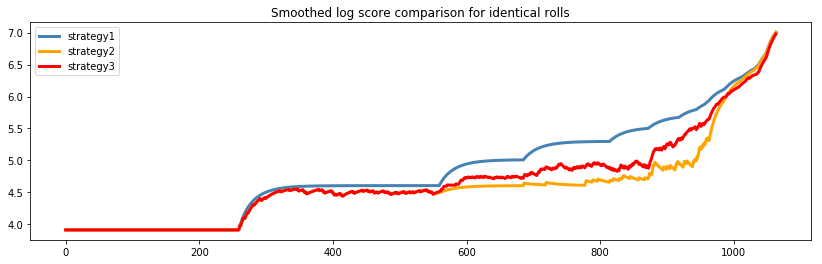

In [3]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def _fixed_dice_trial():
    roll = Dice.roll(randint(1,6))
    options = Farkle.score(roll)
    if not len(options): return [0,0,0,0]
    a = Player.strategy1([], options)[0]
    b = Player.strategy2([], options)[0]
    c = Player.strategy3([], options)[0]
    return a,b,c


values = [_fixed_dice_trial() for _ in range(1500)]
values = sorted(values, key=lambda x: x[0])
values = np.transpose([x for x in values if x[0] > 0])

def numpy_ewma_vectorized(data, window):
#     https://stackoverflow.com/questions/42869495/numpy-version-of-exponential-weighted-moving-average-equivalent-to-pandas-ewm
    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

plt.figure(figsize=(14,4))
val = numpy_ewma_vectorized(np.array(values)[0], 50)
print(np.log, np.log(1.1241231))
labels = ['strategy1', 'strategy2', 'strategy3', 'strategy4']
colors = 'steelblue', 'orange', 'red'
for i in [0,1,2]:
    plt.plot(np.log(list(numpy_ewma_vectorized(np.array(values)[i], 50))), 
             lw=3, 
             label=labels[i],
             color=colors[i])
plt.title("Smoothed log score comparison for identical rolls")
plt.legend(loc='upper left')

/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/Users/wg/.virtualenvs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


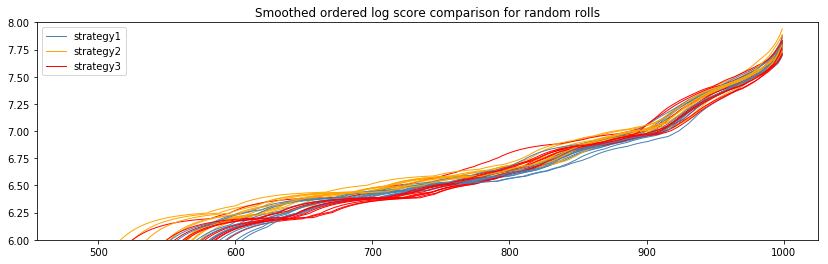

In [4]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def free_floating_dice_trial():
    a =  player1.score_round(player1.roll([]))
    b =  player2.score_round(player2.roll([]))
    c =  player3.score_round(player3.roll([]))
    return a,b,c

plt.figure(figsize=(14,4))

values = [free_floating_dice_trial() for _ in range(1000)]
a,b,c = map(np.array, map(sorted, np.transpose(values)))

plt.plot(np.log(numpy_ewma_vectorized(a, 50)), lw=1, color='steelblue', label='strategy1')
plt.plot(np.log(numpy_ewma_vectorized(b, 50))+.05, lw=1, color='orange', label='strategy2')
plt.plot(np.log(numpy_ewma_vectorized(c, 50)), lw=1, color='red', label='strategy3')

for _ in range(10):
    values = [free_floating_dice_trial() for _ in range(1000)]
    a,b,c = map(np.array, map(sorted, np.transpose(values)))

    plt.plot(np.log(numpy_ewma_vectorized(a, 50)), lw=1, color='steelblue')
    plt.plot(np.log(numpy_ewma_vectorized(b, 50))+.05, lw=1, color='orange')
    plt.plot(np.log(numpy_ewma_vectorized(c, 50)), lw=1, color='red')
plt.ylim(6,8)
plt.title("Smoothed ordered log score comparison for random rolls")
plt.legend(loc='upper left')

In [5]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def free_floating_dice_trial():
    a =  player1.score_round(player1.roll([]))
    b =  player2.score_round(player2.roll([]))
    c =  player3.score_round(player3.roll([]))
    return np.argmax([a,b,c])

values = [free_floating_dice_trial() for _ in range(2000)]

([], <a list of 0 Text xticklabel objects>)

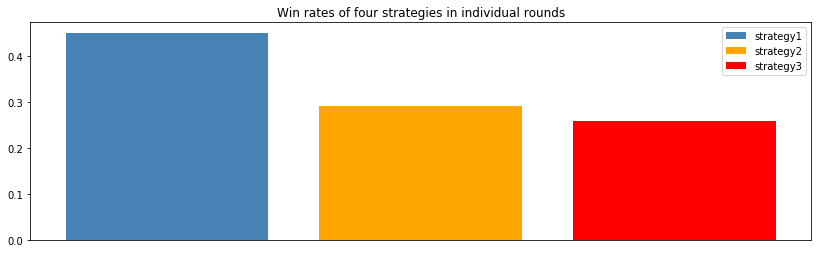

In [6]:
plt.figure(figsize=(14,4))
colors = ['steelblue', 'orange', 'red']
labels = ['strategy1', 'strategy2', 'strategy3']
from collections import Counter
c = Counter(values)
for i,(k,v) in enumerate(sorted(c.items())):
    plt.bar(k, v/2000.0, color=colors[k], label=labels[k])
plt.legend()
plt.title("Win rates of four strategies in individual rounds")
plt.xticks([])

In [7]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def free_floating_dice_trial2():
    roll = [3,3,3,1,2,2]
    a =  player1.score_round(player1.fixed_initial_roll([], roll))
    b =  player2.score_round(player2.fixed_initial_roll([], roll))
    c =  player3.score_round(player3.fixed_initial_roll([], roll))
    return a,b,c

values = [free_floating_dice_trial2() for _ in range(5000)]

In [8]:
a,b,c = np.transpose(values)
bins=range(0,2000,400)
a,_ = np.histogram(a, bins=bins)
b,_ =np.histogram(b, bins=bins)
c,v =np.histogram(c, bins=bins)

Text(0.5, 1.0, 'Distribution of points earned facing [3,3,3,2,2,1]')

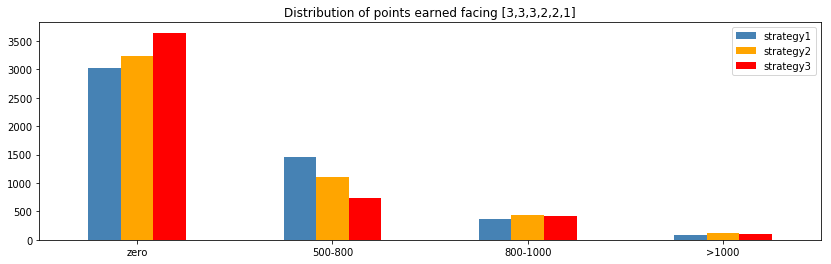

In [9]:
plt.figure(figsize=(14,4))
ax = plt.gca()
pd.DataFrame([a,b,c], columns=v[:-1]).T.plot(kind='bar', ax=ax, color=colors)
plt.legend(['strategy1', 'strategy2', 'strategy3'])
plt.xticks([0,1,2,3], ['zero', '500-800', '800-1000', '>1000'], rotation=0)
plt.title("Distribution of points earned facing [3,3,3,2,2,1]")

Text(0.5, 1.0, 'Win rates of four strategies out of 100 rolls')

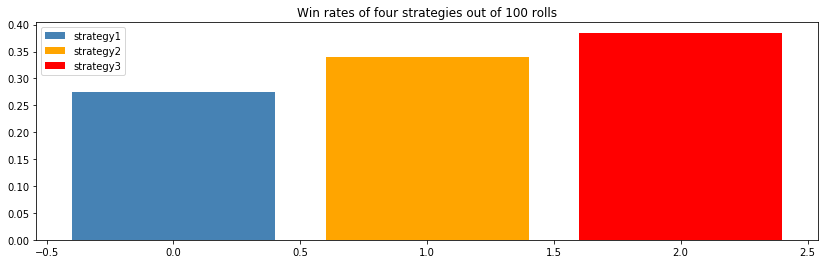

In [15]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def free_floating_dice_trial():
    a =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    b =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    c =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    return np.argmax([a,b,c])

values = [free_floating_dice_trial() for _ in range(200)]
plt.figure(figsize=(14,4))
colors = ['steelblue', 'orange', 'red']
labels = ['strategy1', 'strategy2', 'strategy3']
from collections import Counter
c = Counter(values)
for i,(k,v) in enumerate(sorted(c.items())):
    plt.bar(k, v/200.0, color=colors[k], label=labels[k])
plt.legend()
plt.title("Win rates of four strategies out of 100 rolls")

Text(0.5, 1.0, 'Win rates of four strategies out of 100 rolls')

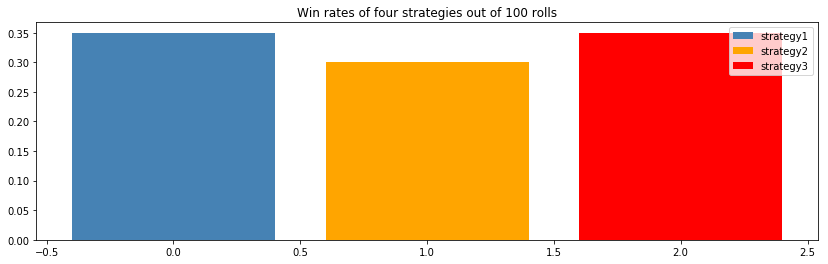

In [17]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

def free_floating_dice_trial():
    a =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    b =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    c =  sum([player1.score_round(player1.roll([])) for _ in range(100)])
    return np.argmax([a,b,c])

values = [free_floating_dice_trial() for _ in range(200)]
plt.figure(figsize=(14,4))
colors = ['steelblue', 'orange', 'red']
labels = ['strategy1', 'strategy2', 'strategy3']
from collections import Counter
c = Counter(values)
for i,(k,v) in enumerate(sorted(c.items())):
    plt.bar(k, v/200.0, color=colors[k], label=labels[k])
plt.legend()
plt.title("Win rates of four strategies out of 100 rolls")

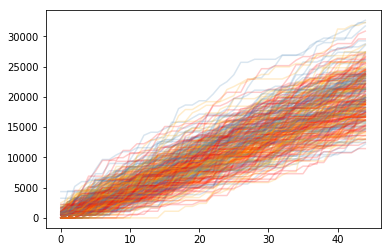

In [12]:
def run(player):
    return np.cumsum([player.score_round(player.roll([])) for _ in range(45)])

for _ in range(100):
    for i, player in enumerate([player1, player2, player3]):
        values = run(player)
        plt.plot(values, color=colors[i], alpha=.2)

In [13]:
player1 = Player('strategy1')
player2 = Player('strategy2')
player3 = Player('strategy3')

turns = []
def free_floating_dice_trial(top):
    scores = [0,0,0]
    i = 0
    top_score = 0
    players = [player1, player2, player3]
    while True:
        if top_score < top:
            player = players[i % 3]
            scores[i % 3] += player.score_round(player.roll([]))
            top_score = max(scores)
            i += 1
        else:
            turns.append(i)
            return np.argmax(scores)

out1 = []
out2 = []
out3 = []
for top in range(1000, 15000, 250):
    values = [free_floating_dice_trial(top) for _ in range(200)]
    from collections import Counter
    c = Counter(values)
    out1.append(c[0] / 200)
    out2.append(c[1] / 200)
    out3.append(c[2] / 200)

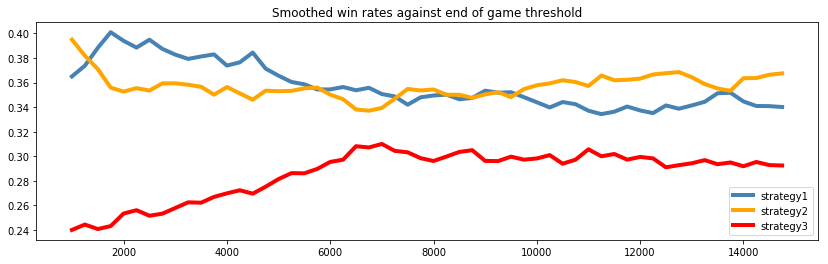

In [14]:
plt.figure(figsize=(14,4))
x = range(1000, 15000, 250)
plt.plot(x, numpy_ewma_vectorized(np.array(out1), 15), color=colors[0], lw=4, label=labels[0])
plt.plot(x, numpy_ewma_vectorized(np.array(out2), 15), color=colors[1], lw=4, label=labels[1])
plt.plot(x, numpy_ewma_vectorized(np.array(out3), 15), color=colors[2], lw=4, label=labels[2])
plt.title("Smoothed win rates against end of game threshold")
plt.legend()